#1 correct annotations.

In [224]:
import os
import cv2
import numpy as np
from glob import glob
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.backend as K
from tensorflow.keras import layers
from PIL import Image
import albumentations as A

from scipy.io import loadmat
import matplotlib.pyplot as plt

# from numpngw import write_png

In [225]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [226]:
### source :
src_image_path = '/content/drive/MyDrive/Colab Notebooks/suadd/inputs/'
src_mask_path = '/content/drive/MyDrive/Colab Notebooks/suadd/depth_annotations_orig/'

### destination
image_corrected_path = '/content/drive/MyDrive/Colab Notebooks/suadd/depth_corrected_inputs/'
mask_corrected_path  = '/content/drive/MyDrive/Colab Notebooks/suadd/depth_corrected_annotations/'


In [7]:

images = [x.split('/')[-1] for x in glob(src_image_path+'*')]
print(len(images))

270


In [8]:

images = [x.split('/')[-1] for x in glob(src_mask_path+'*')]
print(len(images))

0


In [ ]:
import shutil


images = [x.split('/')[-1] for x in glob(src_image_path+'*')]
print(len(images))

for e,p in enumerate(images):
    #images:
    src_img, dst_img = src_image_path + p, image_corrected_path + p
    shutil.copyfile(src_img, dst_img)
    
    #masks:
    src_msk, dst_msk = src_mask_path + p, mask_corrected_path + p
    shutil.copyfile(src_msk, dst_msk)

1786


In [ ]:
len(glob(src_image_path+'*')), len(glob(image_corrected_path+'*'))

(1786, 1786)

In [ ]:
len(glob(src_mask_path+'*')), len(glob(mask_corrected_path+'*'))

(1786, 1786)

In [ ]:
imgcorr = [x.split('/')[-1] for x in glob(image_corrected_path+'*')]
imgorig = [x.split('/')[-1] for x in glob( src_image_path+'*')]
[x for x in imgorig if x not in imgcorr]

[]

In [ ]:
imgcorr = [x.split('/')[-1] for x in glob(mask_corrected_path+'*')]
imgorig = [x.split('/')[-1] for x in glob( src_mask_path+'*')]
[x for x in imgorig if x not in imgcorr]

[]

In [ ]:
# check mask vs image shape

In [ ]:
img_name = 'a219be9df80b4431bd952700b840262f-1622741974400009778'

print(cv2.imread(image_corrected_path+img_name+'.png').shape)
print(cv2.imread(mask_corrected_path+img_name+'.png').shape)

(2200, 1550, 3)
(2200, 1550, 3)


In [ ]:
img_name = 'aebae6ef758540f28814cc34e43b1952-1619035678800002304'

print(cv2.imread(image_corrected_path+img_name+'.png').shape)
print(cv2.imread(mask_corrected_path+img_name+'.png').shape)

(2200, 1550, 3)
(2200, 1550, 3)


In [227]:
import numpy as np
from PIL import Image
import torch
# from torchvision import transforms

def read_image(path):
    image = np.array(Image.open(path))
    return image


In [228]:
# image_corrected_path

images = [x.split('/')[-1] for x in glob(image_corrected_path+'*')]
print(len(images))

3165


In [229]:
images = [x.split('/')[-1] for x in glob(mask_corrected_path+'*')]
print(len(images))

3165


In [230]:
glob(mask_corrected_path+'*')[0]

'/content/drive/MyDrive/Colab Notebooks/suadd/depth_corrected_annotations/dd6b19911f1843d695fe490b2b7e60b0-1631484398000003932__2_0.png'

In [231]:
def read_depth_image(path):
    arr = read_image(path)
    mask = arr == 0
    f_img = (arr - 1)/128.0
    f_img[mask] = 0
    return np.float32(f_img)


In [242]:
toto_max = []
toto_min = []
toto_mean = []
for i in glob(mask_corrected_path+'*'):
  toto_max.append(read_depth_image(i).max())
  toto_min.append((read_depth_image(i)[read_depth_image(i)>0]).min())
  toto_mean.append((read_depth_image(i)[read_depth_image(i)>0]).mean())

In [244]:
max(toto_max), min(toto_max), max([x for x in toto_min if x >0]), min([x for x in toto_min if x >0]), max(toto_mean), min(toto_mean)

(511.98438, 5.4921875, 17.367188, 1.921875, 26.705214, 4.272437)

In [245]:
# [x for x in toto if x >70 ]

In [246]:
totot = []
for i in glob(mask_corrected_path+'*'):
  totot.append((i, read_depth_image(i).max()))

In [247]:
olll = []
for k in totot:
  if k[1] > 50:
    olll.append(k[0])

In [248]:
olll

['/content/drive/MyDrive/Colab Notebooks/suadd/depth_corrected_annotations/231e0de8208a4fc1aba1cc4f2eaaac42-1622065380000001871__3_2.png',
 '/content/drive/MyDrive/Colab Notebooks/suadd/depth_corrected_annotations/e6d7db99b4714c478df0187bc99b3e47-1624393553400009728__3_4.png',
 '/content/drive/MyDrive/Colab Notebooks/suadd/depth_corrected_annotations/167f22e1c6d0452a9cdc6dafa92848bd-1624901439400001792__2_2.png',
 '/content/drive/MyDrive/Colab Notebooks/suadd/depth_corrected_annotations/d7bf309a43af485d9ba6e80598407468-1621891239100015531__3_2.png',
 '/content/drive/MyDrive/Colab Notebooks/suadd/depth_corrected_annotations/d7bf309a43af485d9ba6e80598407468-1621891235400015461__3_3.png',
 '/content/drive/MyDrive/Colab Notebooks/suadd/depth_corrected_annotations/ba5487adfa3d4e09bea7d567b5faef52-1619108698300008597__3_0.png',
 '/content/drive/MyDrive/Colab Notebooks/suadd/depth_corrected_annotations/1d3502a94e164047b72dfb256fc3222d-1618852827900006680__3_0.png',
 '/content/drive/MyDrive/Co

In [215]:
aaa = read_depth_image(olll[12])

In [216]:
mask = (aaa > 50)

In [217]:
mask.sum()

46

In [223]:
for kk in olll:
  aaa = read_depth_image(kk)
  mask =(aaa>50)
  print(mask.sum())

49
8
8
120
24953
100
84
49
30
5
21
63
46
371
5
72
8
2690
6150
144
129
2
1837
125
49
122
3984
422
14
342
19
26
26
26
15
66
4009
84
27
3219
4254
349
10014
1868
337
78
108
34
749
1
47
47
47
94
475
102
102
102
2036
11659
73419
45199
973
399
3350
3350
3350
4568
255
746
15329
4669
15329
4669
15329
4669
37
37
37
12
12
12
24
24
24
17025
296
3250
452
8
2427
19
844
973
4568
36
84
14
30
349
10014
8
49
1
5
100
63
4
47
239
49
102
255
12
3
23
191
371
78
61
337
11
296
8
13
12
202
3
3250
108
66
762
813
17025
95
3984
15
4009
45199
67
44
94
99
24
3350
175
5
83
452
400
3219
61
4254
26
341
2603
36
61
9
54
22
61
47
342
10992
36
34
1837
178
132
129
2690
6150
15329
24
143
144
21
84
341
749
4669
21
129
1504
27
49
1057
7
422
62
2603
11659
120
1570
37
138
100
5
24953
1868
1
2036
2
109
14
73419
475
22
72
746
5
732
122
13
20
125
5
399
689
10
2
46
97
352
14
9159
31
96
326
65
10
1631
1797
1100
11
44
58


In [218]:
aaa[aaa<500].max()

224.64844

In [219]:
ooo = aaa.copy()
ooo[~mask] = 255.
ooo[mask] =0.

ooo

array([[255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       ...,
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.]], dtype=float32)

In [220]:
from scipy.io import loadmat
import matplotlib.pyplot as plt

In [221]:
ooo

array([[255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       ...,
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.]], dtype=float32)

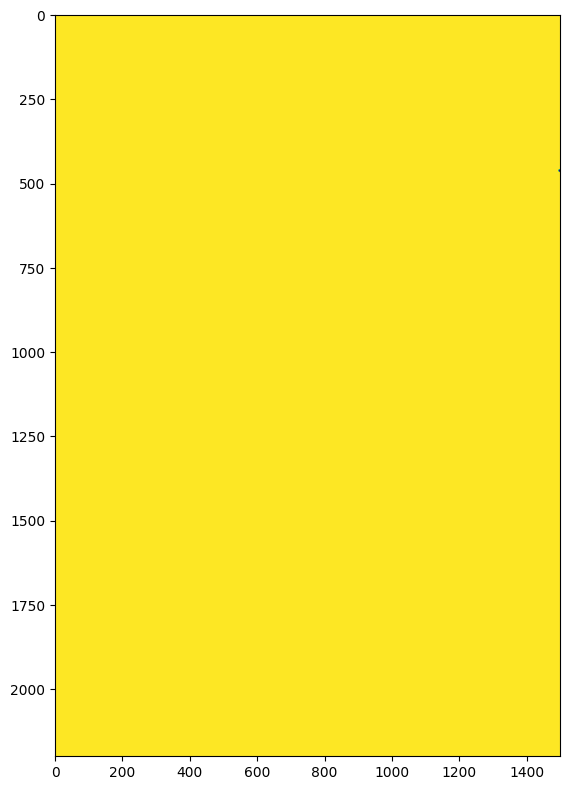

In [222]:
plt.figure(figsize=(30,30))
plt.subplot(1,4,1)
plt.imshow(ooo.astype('uint8'))